# Extracción de la red vial de Hermosillo


## 1. Descripción general

Esta notebook forma parte del proyecto [**Relacion Baches Accidentes HMO**](https://github.com/Ingenieria-de-Caracteristicas-MCD/Relacion_Baches_Accidentes_HMO). 

En esta notebook se documenta el flujo de trabajo para obtener la red vial de Hermosillo, Sonora, México, a partir de datos abiertos de **OpenStreetMap** usando la librería `osmnx`.

El proceso incluye: 

- Configuración de caché y rutas intermedias. 
- Descarga de la red vial (`network_type`='drive').
- Conversión del grafo a capas de nodes y edges. 
- Exportación en formato shapefile (`.shp`). 

El script `src/extract_vialidades.py` contiene la lógica del proceso descrito anteriormente. 

## 2. Configuración del entorno

A continuación se importan las funciones y rutas necesarias para ejecutar el flujo completo de extracción de los datos de vialidades. 

El archivo `src/config.py` define las rutas base del proyecto, mientas que el módulo `src/extract_vialidades.py` contiene la lógica de extracción de los datos. 

In [10]:
import sys
from pathlib import Path

import osmnx as ox
import pandas as pd
import geopandas as gpd

In [3]:
SRC_DIR = Path().resolve().parent / "src"

if str(SRC_DIR) not in sys.path: 
    sys.path.insert(0, str(SRC_DIR))

# for x in sys.path: print(x)

In [6]:
from config import ROOT_DIR, RAW_DIR, INTERIM_DIR
from extract_vialidades import download_hmo_roads, export_graph_to_shapefiles

# Verificación de rutas
print("Raw data directory:", RAW_DIR.relative_to(ROOT_DIR), RAW_DIR.exists(), RAW_DIR.is_dir())
print("Interim data directory:", INTERIM_DIR.relative_to(ROOT_DIR), INTERIM_DIR.exists(), INTERIM_DIR.is_dir())

Raw data directory: data\raw True True
Interim data directory: data\interim True True


## 3. Descarga de la red vial

A continuación, se descarga la red vial del municipio de Hermosillo utilizando el tipo de red `drive`, que incluye carreteras, calles y caminos transitables en automóvil. 

* **Nota**: En esta libreta, el proceso de descarga es rápido debido a que ya se dispone de una caché de los datos. La primera descarga de los datos puede tardar aproximadamente 15 minutos, dependiendo de la velocidad de la conexión a internet. 

In [7]:
G = download_hmo_roads(network_type="drive", simplify=True)

2025-10-13 14:16:26,557 - INFO - extract_vialidades.py - Descargando red vial de Hermosillo, Sonora, México (tipo=drive)...

2025-10-13 14:17:13,373 - INFO - extract_vialidades.py - Descarga completada



## 4. Conversión a `GeoDataFrame` y exportación

En la siguiente celda, se generan los shapefiles correspondientes a los **nodes** y **edges** de la red vial, estos se guardan en las rutas: 

- `interim/geo/hermosillo_nodes.shp`
- `interim/geo/hermosillo_edges.shp`

In [8]:
nodes_path, edges_path = export_graph_to_shapefiles(G)

2025-10-13 14:22:04,372 - INFO - extract_vialidades.py - Convirtiendo grafo a GeoDataFrames...

2025-10-13 14:22:08,195 - INFO - extract_vialidades.py - Exportando edges -> data\interim\geo\hermosillo_edges.shp
c:\Users\isaul\Documents\repos\Relacion_Baches_Accidentes_HMO\.venv\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value '[753713414, 726972683, 726972686, 727152912, 727152913, 727152914, 727152915, 727152920, 727152921, 727152922, 727152923, 727152924, 753713406, 727152944, 727152951, 727152955, 727152957, 726977854, 726977855, 726977856, 726977859, 726977860, 726977861, 726977862, 727152964, 727152974, 726977871, 765767508, 765767509, 753713379, 753713382, 753713383, 753713392, 753713393, 753713395, 753713396, 753713397, 753713398, 753713399, 753713400, 753713402, 753713403, 753713405, 916026622, 916026623]' of field osmid has been truncated to 254 characters.  This warning will not be emitted any more for that layer.
  ogr_write(
2025-10-13 14:22:15,329 - INFO - extra

## 5. Visualización rápida 

In [9]:
# Mostrar un extracto de los datos exportados
edges = gpd.read_file(edges_path)
edges.head(3)

,u,v,key,osmid,highway,name,ref,oneway,reversed,length,maxspeed,lanes,bridge,width,tunnel,junction,access,geometry
0,316362546,3173455691,0,566790774,tertiary,Calle 26,SON 110;SON 26,False,True,78.609461,None,None,None,None,None,None,None,"LINESTRING (-111.39132 28.56881, -111.39051 28..."
1,316362546,8672499462,0,566802152,secondary,Calle 4 Sur,SON 61,False,True,28.811070,None,None,None,None,None,None,None,"LINESTRING (-111.39132 28.56881, -111.39132 28..."
2,316362546,6542895733,0,566790774,tertiary,Calle 26,SON 110;SON 26,False,False,1137.846695,None,None,None,None,None,None,None,"LINESTRING (-111.39132 28.56881, -111.39399 28..."


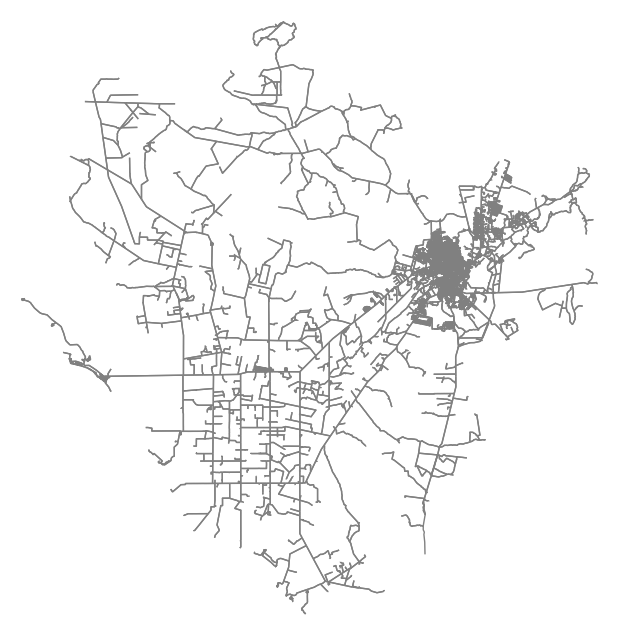

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
# Vista general del grafo
ox.plot_graph(G, node_size=0, edge_color="gray", bgcolor="white")

## 6. Uso desde la terminal

Es posible correr el script directamente de la terminal sin usar la notebook: 

```bash
python src/extract_vialidades.py
```

Esto generará automáticamente los archivos `.shp` en `interim/geo/` y mostrará los logs del proceso. 

## 7. Conclusión

En esta notebook se generaron las capas base de vialidades de Hermosillo a partir de OSM usando `osmnx`.
  
Estas capas serán utilizadas en análisis espaciales posteriores y en la vinculación con datasets de accidentes y colonias.
